<a href="https://colab.research.google.com/github/andidprastyo/PCVK_Ganjil_2023/blob/main/week%20-%2010/week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries

In [4]:
from google.colab import drive
import cv2
import numpy as np
import pytesseract as pt
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from pytesseract import Output

In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


### Load Data

(-0.5, 959.5, 539.5, -0.5)

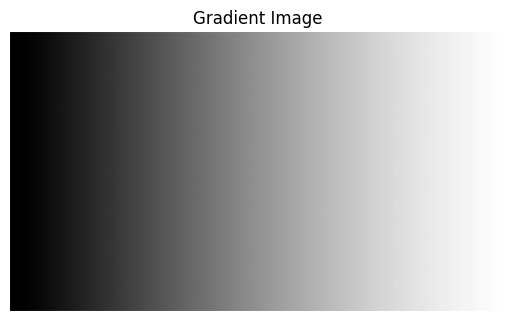

In [6]:
img = cv2.imread('drive/MyDrive/image_thres/gradient.jpg')
thresh = 170

plt.title('Gradient Image')
plt.imshow(img)
plt.axis('off')

### Global Threshold

In [7]:
ret, t1 = cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY)
ret, t2 = cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY_INV)
ret, t3 = cv2.threshold(img, thresh, 255, cv2.THRESH_TRUNC)
ret, t4 = cv2.threshold(img, thresh, 255, cv2.THRESH_TOZERO)
ret, t5 = cv2.threshold(img, thresh, 255, cv2.THRESH_TOZERO_INV)

titles = ['Original', 'Binary', 'Binary Inv', 'Trunc', 'Tozero', 'Tozero Inv']
images = [img, t1, t2, t3, t4, t5]

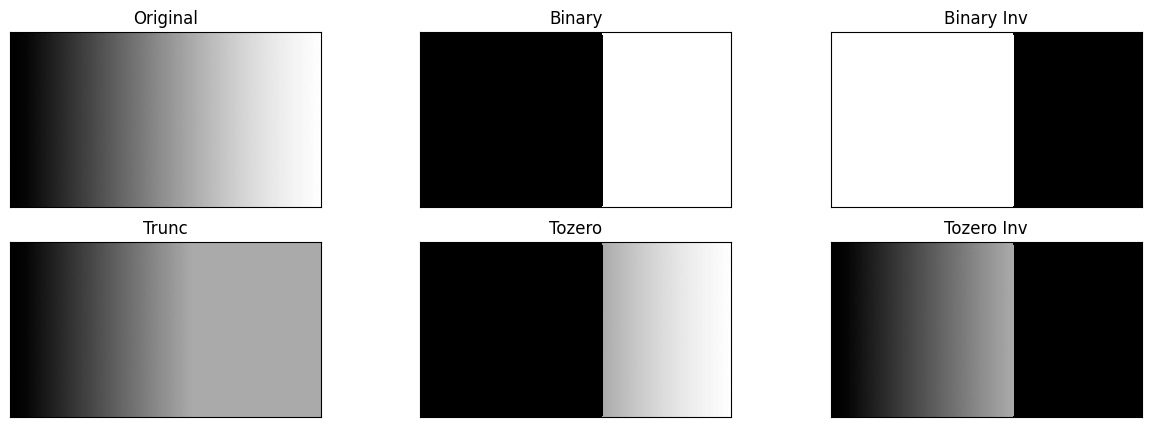

In [8]:
plt.figure(figsize=(15, 5))

for i in range(len(images)):
	plt.subplot(2, 3, i+1)
	plt.imshow(images[i], 'gray', interpolation='nearest')
	plt.title(titles[i])
	plt.xticks([])
	plt.yticks([])

plt.show()

### Otsu Threshold

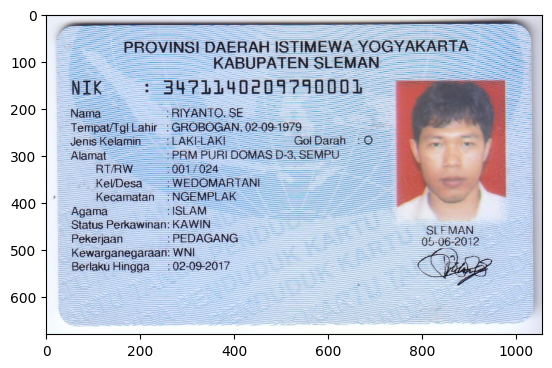

In [9]:
ktp = cv2.imread('./drive/MyDrive/KTP_More/ktp.png')
ktp = cv2.cvtColor(ktp, cv2.COLOR_BGR2RGB)
plt.imshow(ktp)

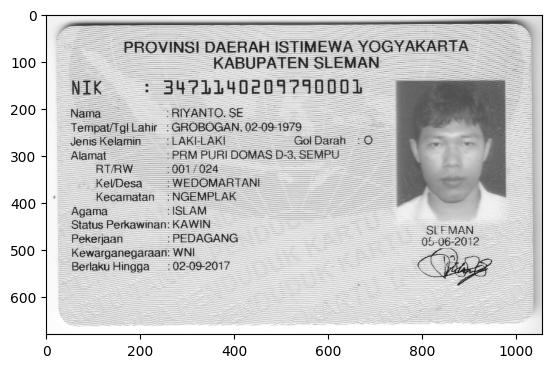

In [10]:
ktp_gray = cv2.cvtColor(ktp, cv2.COLOR_BGR2GRAY)
plt.imshow(ktp_gray, cmap='gray')

167


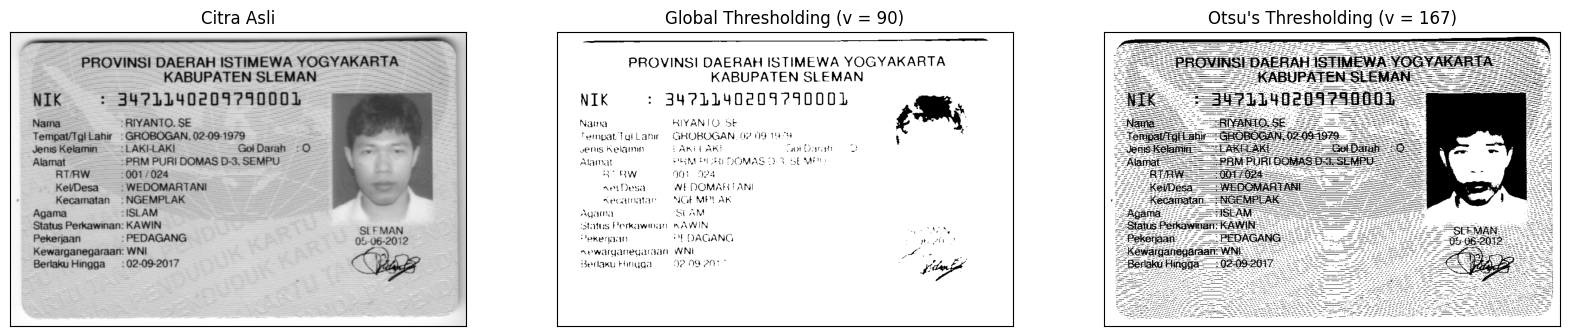

In [11]:
img = cv2.imread('./drive/MyDrive/KTP_More/ktp.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(img,(5,5),0)

def otsu(gray):
  pixel_number = gray.shape[0] * gray.shape[1]
  mean_weight = 1.0/pixel_number
  his, bins = np.histogram(gray, np.arange(0,257))
  final_thresh = -1
  final_value = -1
  intensity_arr = np.arange(256)

  for t in bins[1:-1]: # This goes from 1 to 254 uint8 range (Pretty sure wont be those values)
    pcb = np.sum(his[:t])
    pcf = np.sum(his[t:])
    Wb = pcb * mean_weight
    Wf = pcf * mean_weight
    mub = np.sum(intensity_arr[:t]*his[:t]) / float(pcb)
    muf = np.sum(intensity_arr[t:]*his[t:]) / float(pcf)
    #print mub, muf
    value = Wb * Wf * (mub - muf) ** 2

    if value > final_value:
      final_thresh = t
      final_value = value
  final_img = gray.copy()
  print(final_thresh)
  final_img[gray > final_thresh] = 255
  final_img[gray < final_thresh] = 0
  return final_img, final_thresh

otsu_biner, otsu_thresh = otsu(img)
x = ("Otsu's Thresholding (v = ")+str(otsu_thresh)+")"
ret,th1 = cv2.threshold(blur,90,255,cv2.THRESH_BINARY)
#ret,th2 = cv2.threshold(blur,thresh,255,cv2.THRESH_BINARY)
titles = ['Citra Asli', 'Global Thresholding (v = 90)', x]
citra3 = [blur, th1, otsu_biner]
plt.figure(figsize = (20,15))

for i in range(len(citra3)):
  plt.subplot(1,3,i+1)
  plt.imshow(citra3[i],cmap='gray')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

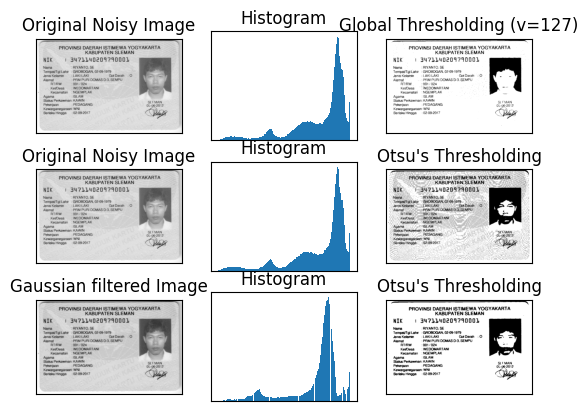

In [12]:
# global thresholding
global_threshold,th1 = cv2.threshold(ktp_gray,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
otsu_threshold,th2 = cv2.threshold(ktp_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(ktp_gray,(5,5),0)
otsu_gaussian,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [ktp_gray, 0, th1,
          ktp_gray, 0, th2,
          blur, 0, th3]

titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])

plt.show()

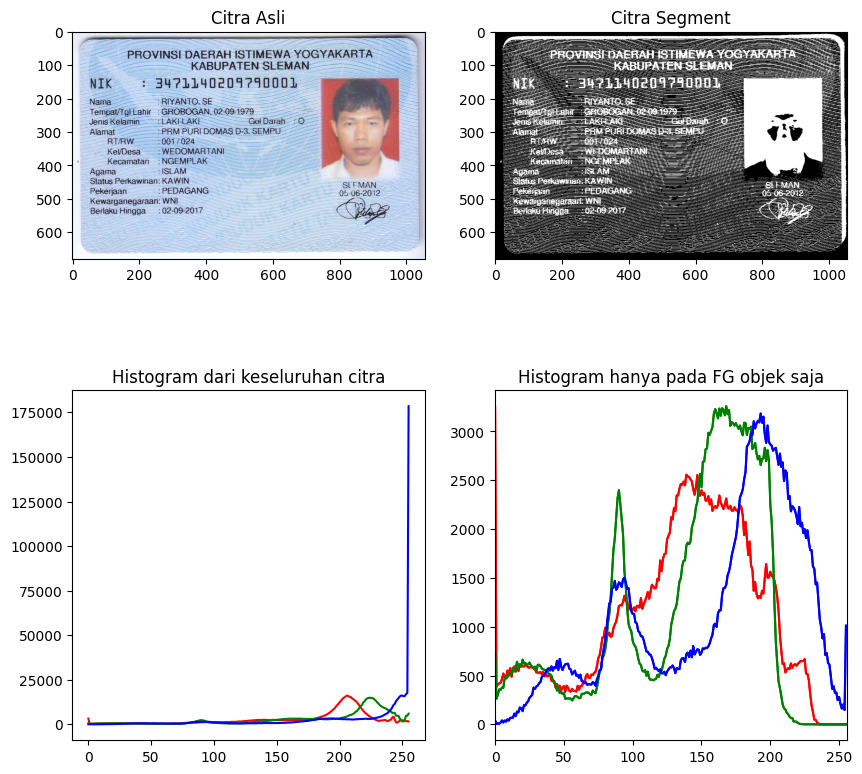

In [13]:
img = cv2.imread('./drive/MyDrive/KTP_More/ktp.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret3,mask = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img_rgb)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')

for i,col in enumerate(color):
    hist0 = cv2.calcHist([img_rgb],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(hist0,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv2.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv2.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256])

plt.show()

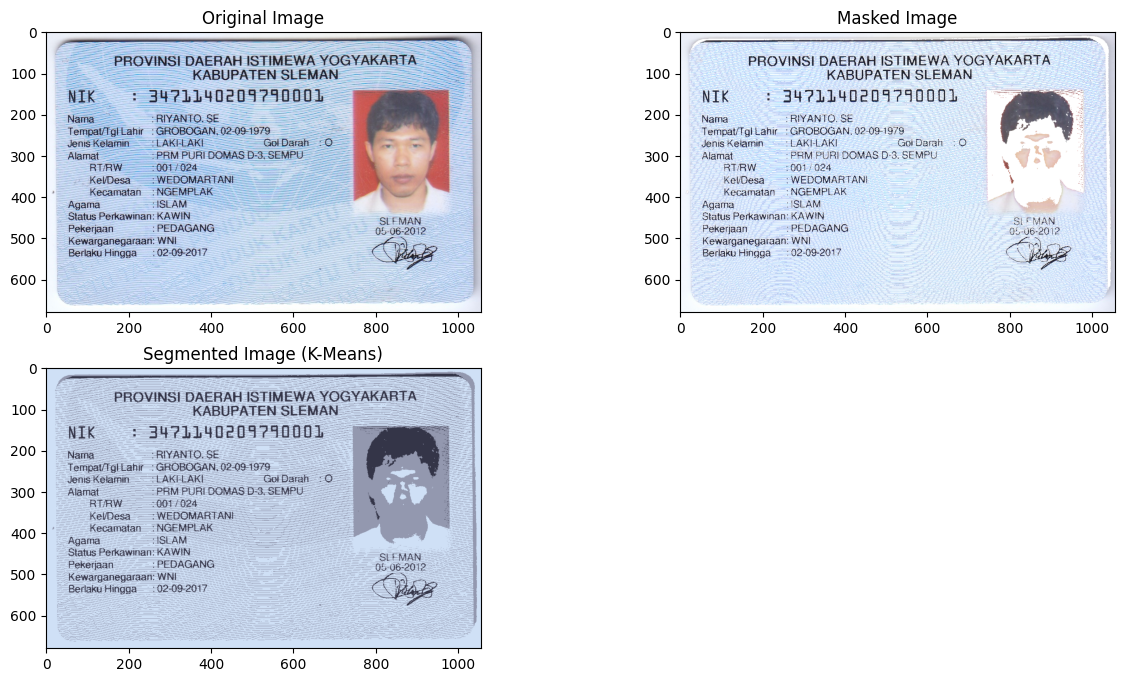

In [14]:
img = cv2.imread('./drive/MyDrive/KTP_More/ktp.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Flatten the pixel values
pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Define the criteria and the number of clusters (k)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3# Number of clusters

# Apply K-Means clustering
# K-Means dari library openCV
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert the centers to integers
centers = np.uint8(centers)

# Flatten the labels array
labels = labels.flatten()

# Create a masked image by turning one cluster into white
masked_image = np.copy(img)
masked_image = masked_image.reshape((-1, 3))
cluster_to_white = 2
masked_image[labels == cluster_to_white] = [255, 255, 255]
masked_image = masked_image.reshape(img.shape)

# Convert the segmented image back to the original shape
segmented_image = centers[labels].reshape(img.shape)

# Display the original image, segmented image, and masked image
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1), plt.imshow(img)
plt.title('Original Image')

plt.subplot(2, 2, 2), plt.imshow(masked_image)
plt.title('Masked Image')

plt.subplot(2, 2, 3), plt.imshow(segmented_image)
plt.title('Segmented Image (K-Means)')

plt.show()

### OCR

#### K-Means Segmentation + Otshu Thresholding

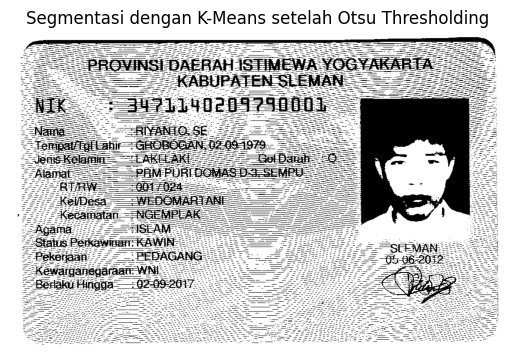


Hasil Ekstrak Teks dari Segmentasi KMeans

 

 



In [17]:
# Baca citra KTP
ktp_img = cv2.imread('./drive/MyDrive/KTP_More/ktp.png')
ktp_gray = cv2.cvtColor(ktp_img, cv2.COLOR_BGR2GRAY)

# Otsu's thresholding pada citra
_, otsu_thresholded = cv2.threshold(ktp_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Konversi citra ke tipe float32
image_2d = np.float32(otsu_thresholded)

# Reshape citra ke 1 kolom dan banyak baris
image_2d = image_2d.reshape((-1, 1))

# Definisikan kriteria berhenti untuk KMeans
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# Jumlah cluster yang diinginkan
k = 2

# Jalankan algoritma KMeans
_, labels, centers = cv2.kmeans(image_2d, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Konversi kembali ke tipe uint8 dan ubah ukuran ke ukuran citra asli
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
segmented_image = segmented_data.reshape(otsu_thresholded.shape)

# Tampilkan hasil KMeans segmentation
plt.imshow(segmented_image, cmap='gray')
plt.title('Segmentasi dengan K-Means setelah Otsu Thresholding')
plt.axis('off')
plt.show()

# Ekstrak teks dari citra hasil segmentasi KMeans
extracted_text = pt.image_to_string(segmented_image)

# Tampilkan teks yang diekstrak
print("\nHasil Ekstrak Teks dari Segmentasi KMeans\n\n" + extracted_text)


#### Gaussian Blur

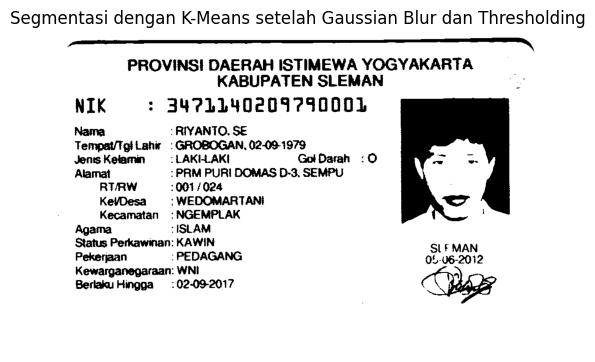


Hasil Ekstrak Teks dari Segmentasi KMeans

Oe
PROVINS! DAERAH ISTIMEWA YOGYAKARTA

 

KABUPATEN SLEMAN

NIK >: 347113490209790001
Nama /RIYANTO. SE
Tempat/Tg! Lahr : GROBOGAN, 02-09-1979
Jens Kelamin =: LAKI-LAKI GolDarah :O
Alamat : PRM PURI DOMAS D-3. SEMPU

RTURW :001/024

Ke¥Desa  : WEDOMARTANI

Kecamatan : NGEMPLAK
Agama :ISLAM
Status Perkawinan: KAWIN
Pekerjaan : PEDAGANG oon ye

Kewarganegaraan: WNI

Berlaku Hingga 02-09-2017 Ce



In [19]:
# Baca citra KTP
ktp_img = cv2.imread('./drive/MyDrive/KTP_More/ktp.png')
ktp_gray = cv2.cvtColor(ktp_img, cv2.COLOR_BGR2GRAY)

# Menggunakan Gaussian Blur untuk mengurangi noise
blurred_img = cv2.GaussianBlur(ktp_gray, (5, 5), 0)

# Terapkan thresholding pada citra yang telah di-blur
_, gaussian_thresholded = cv2.threshold(blurred_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Konversi citra ke tipe float32
image_2d = np.float32(gaussian_thresholded)

# Reshape citra ke 1 kolom dan banyak baris
image_2d = image_2d.reshape((-1, 1))

# Definisikan kriteria berhenti untuk KMeans
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# Jumlah cluster yang diinginkan
k = 2

# Jalankan algoritma KMeans
_, labels, centers = cv2.kmeans(image_2d, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Konversi kembali ke tipe uint8 dan ubah ukuran ke ukuran citra asli
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
segmented_image = segmented_data.reshape(gaussian_thresholded.shape)

# Tampilkan hasil KMeans segmentation
plt.imshow(segmented_image, cmap='gray')
plt.title('Segmentasi dengan K-Means setelah Gaussian Blur dan Thresholding')
plt.axis('off')
plt.show()

# Ekstrak teks dari citra hasil segmentasi KMeans
extracted_text = pt.image_to_string(segmented_image)

# Tampilkan teks yang diekstrak
print("\nHasil Ekstrak Teks dari Segmentasi KMeans\n\n" + extracted_text)


#### Global

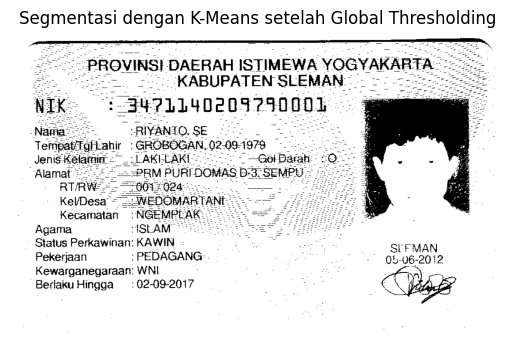


Hasil Ekstrak Teks dari Segmentasi KMeans setelah Global Thresholding

A PROVINS! DAERAH ISTIMEWA YOGYAKAR
KABUPATEN SLEMAN = -

aunuo20529000)

Kecamatan
Agama
Status Perkawinan: KAWIN Lot i . StFMAN
Pekerjaan : PEDAGANG : 05-06-2012
Kewarganegaraan: WNI. . °
Berlaku Hingga | 02-09-2017 . oH

N

     



In [21]:
# Baca citra KTP
ktp_img = cv2.imread('./drive/MyDrive/KTP_More/ktp.png')
ktp_gray = cv2.cvtColor(ktp_img, cv2.COLOR_BGR2GRAY)

# Terapkan thresholding global
_, global_thresholded = cv2.threshold(ktp_gray, 127, 255, cv2.THRESH_BINARY)

# Konversi citra ke tipe float32
image_2d = np.float32(global_thresholded)

# Reshape citra ke 1 kolom dan banyak baris
image_2d = image_2d.reshape((-1, 1))

# Definisikan kriteria berhenti untuk KMeans
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# Jumlah cluster yang diinginkan
k = 2

# Jalankan algoritma KMeans
_, labels, centers = cv2.kmeans(image_2d, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Konversi kembali ke tipe uint8 dan ubah ukuran ke ukuran citra asli
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
segmented_image = segmented_data.reshape(global_thresholded.shape)

# Tampilkan hasil KMeans segmentation setelah thresholding global
plt.imshow(segmented_image, cmap='gray')
plt.title('Segmentasi dengan K-Means setelah Global Thresholding')
plt.axis('off')
plt.show()

# Ekstrak teks dari citra hasil segmentasi KMeans
extracted_text = pt.image_to_string(segmented_image)

# Tampilkan teks yang diekstrak
print("\nHasil Ekstrak Teks dari Segmentasi KMeans setelah Global Thresholding\n\n" + extracted_text)